# LA, California Crime Data 2020 to Present

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [11]:
df = pd.read_csv('Crime_Data_from_2020_to_Present.csv')

In [12]:
df.shape

(1005198, 28)

In [13]:
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005198 entries, 0 to 1005197
Data columns (total 28 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   DR_NO           1005198 non-null  int64  
 1   Date Rptd       1005198 non-null  object 
 2   DATE OCC        1005198 non-null  object 
 3   TIME OCC        1005198 non-null  int64  
 4   AREA            1005198 non-null  int64  
 5   AREA NAME       1005198 non-null  object 
 6   Rpt Dist No     1005198 non-null  int64  
 7   Part 1-2        1005198 non-null  int64  
 8   Crm Cd          1005198 non-null  int64  
 9   Crm Cd Desc     1005198 non-null  object 
 10  Mocodes         853438 non-null   object 
 11  Vict Age        1005198 non-null  int64  
 12  Vict Sex        860416 non-null   object 
 13  Vict Descent    860404 non-null   object 
 14  Premis Cd       1005182 non-null  float64
 15  Premis Desc     1004610 non-null  object 
 16  Weapon Used Cd  327280 non-null   fl

In [15]:
df.isna().sum()

DR_NO                   0
Date Rptd               0
DATE OCC                0
TIME OCC                0
AREA                    0
AREA NAME               0
Rpt Dist No             0
Part 1-2                0
Crm Cd                  0
Crm Cd Desc             0
Mocodes            151760
Vict Age                0
Vict Sex           144782
Vict Descent       144794
Premis Cd              16
Premis Desc           588
Weapon Used Cd     677918
Weapon Desc        677918
Status                  1
Status Desc             0
Crm Cd 1               11
Crm Cd 2           936039
Crm Cd 3          1002884
Crm Cd 4          1005134
LOCATION                0
Cross Street       850955
LAT                     0
LON                     0
dtype: int64

In [16]:
df.head(2)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628


---
## Rename Columns

In [17]:
# renaming columns for pandas compatability
df = df.rename(columns=
    {
    'Date Rptd':'Date_Rptd',
    'DATE OCC': 'DATE_OCC',
    'TIME OCC': 'TIME_OCC',
    'AREA NAME': 'AREA_NAME',
    'Rpt Dist No': 'Rpt_Dist_No',
    'Part 1-2': 'Part_1_2',
    'Crm Cd': 'Crm_Cd',
    'Crm Cd Desc' : 'Crm_Cd_Desc',
    'Vict Age': 'Vict_Age',
    'Vict Sex': 'Vict_Sex',
    'Vict Descent': 'Vict_Descent',
    'Premis Cd': 'Premis_Cd',
    'Premis Desc': 'Premis_Desc',
    'Weapon Used Cd': 'Weapon_Used_Cd',
    'Weapon Desc': 'Weapon_Desc',
    'Status Desc': 'Status_Desc',
    'Crm Cd 1': 'Crm_Cd_1',
    'Crm Cd 2': 'Crm_Cd_2',
    'Crm Cd 3': 'Crm_Cd_3',
    'Crm Cd 4': 'Crm_Cd_4',
    'Cross Street': 'Cross_Street'
    }
         )    

In [18]:
df.columns

Index(['DR_NO', 'Date_Rptd', 'DATE_OCC', 'TIME_OCC', 'AREA', 'AREA_NAME',
       'Rpt_Dist_No', 'Part_1_2', 'Crm_Cd', 'Crm_Cd_Desc', 'Mocodes',
       'Vict_Age', 'Vict_Sex', 'Vict_Descent', 'Premis_Cd', 'Premis_Desc',
       'Weapon_Used_Cd', 'Weapon_Desc', 'Status', 'Status_Desc', 'Crm_Cd_1',
       'Crm_Cd_2', 'Crm_Cd_3', 'Crm_Cd_4', 'LOCATION', 'Cross_Street', 'LAT',
       'LON'],
      dtype='object')


## Remove Time From Date_Rptd and Date_OCC columns

In [19]:
df[['Date_Rptd', 'DATE_OCC']].tail(2)

,Date_Rptd,DATE_OCC
1005196,02/27/2025 12:00:00 AM,02/27/2025 12:00:00 AM
1005197,03/25/2025 12:00:00 AM,03/25/2025 12:00:00 AM


In [20]:
''' removing unnessesary time in date columns '''

pattern = r'12:00:00 AM'

date_rptd_col = df['Date_Rptd']
date_occ_col = df['DATE_OCC']

df['DATE_OCC'] = date_occ_col.str.replace(pattern, '').str.strip()
df['Date_Rptd']  = date_rptd_col.str.replace(pattern, '').str.strip()

df[['Date_Rptd', 'DATE_OCC']].tail(2)

,Date_Rptd,DATE_OCC
1005196,02/27/2025,02/27/2025
1005197,03/25/2025,03/25/2025


## Extract Year from DATE_OCC

In [21]:
pattern = r'/(\d{4})'

YEAR_OCC = date_occ_col.str.extract(pattern)

df['YEAR_OCC'] = YEAR_OCC

In [22]:
df[['DATE_OCC', 'YEAR_OCC']].head(2)

,DATE_OCC,YEAR_OCC
0,03/01/2020,2020
1,02/08/2020,2020


## Extract Month/Day from DATE_OCC

In [23]:
MM_DD_OCC = date_occ_col.str[0:5]
df['MM_DD_OCC'] = MM_DD_OCC

## Extract Month from DATE_OCC

In [24]:
MM_OCC = date_occ_col.str[:2]
df['MM_OCC'] = MM_OCC

In [25]:
df[['DATE_OCC', 'MM_OCC']].head(2)

,DATE_OCC,MM_OCC
0,03/01/2020,03
1,02/08/2020,02


## Extract Hour From TIME_OCC

In [26]:
time_occ_col = df['TIME_OCC'].astype(str)

pattern = r'^(\d{2})'

time_occ_col = time_occ_col.str.zfill(4)
time_occ_col = time_occ_col.str.extract(pattern)

df['HR_OCC'] = time_occ_col

In [27]:
df[['TIME_OCC', 'HR_OCC']].head(2)

,TIME_OCC,HR_OCC
0,2130,21
1,1800,18


In [28]:
df.head(1)

,DR_NO,Date_Rptd,DATE_OCC,TIME_OCC,AREA,AREA_NAME,Rpt_Dist_No,Part_1_2,Crm_Cd,Crm_Cd_Desc,...,Crm_Cd_3,Crm_Cd_4,LOCATION,Cross_Street,LAT,LON,YEAR_OCC,MM_DD_OCC,MM_OCC,HR_OCC
0,190326475,03/01/2020,03/01/2020,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506,2020,03/01,03,21


---
## 20 Most Common Crimes In Los Angeles, California

In [29]:
crime_count = df.Crm_Cd_Desc.value_counts()

In [30]:
#'VEHICLE - STOLEN | BURGLARY FROM VEHICLE | THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER) | THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER) | VEHICLE - ATTEMPT STOLEN | THEFT FROM MOTOR VEHICLE - ATTEMPT | BURGLARY FROM VEHICLE, ATTEMPTED' 
vehicle_crimes = df['Crm_Cd_Desc'].loc[(df['Crm_Cd_Desc'] == 'VEHICLE - STOLEN') | 
                                        (df['Crm_Cd_Desc'] == 'BURGLARY FROM VEHICLE') |
                                        (df['Crm_Cd_Desc'] == 'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)') |
                                        (df['Crm_Cd_Desc'] == 'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)') |
                                        (df['Crm_Cd_Desc'] == 'VEHICLE - ATTEMPT STOLEN') |
                                        (df['Crm_Cd_Desc'] == 'THEFT FROM MOTOR VEHICLE - ATTEMPT') |
                                        (df['Crm_Cd_Desc'] == 'BURGLARY FROM VEHICLE, ATTEMPTED') ].value_counts()

In [31]:
crime_type = pd.DataFrame(crime_count.items(), columns=['CrimeDescription', 'Count'])
crime_type = crime_type.sort_values(by='Count', ascending = False)
crime_type = crime_type.set_index('CrimeDescription')
crime_type_20 = crime_type.head(20)

In [32]:
vehicle_crime_type = pd.DataFrame(vehicle_crimes.items(), columns=['CrimeDescription', 'Count'])
vehicle_crime_type = vehicle_crime_type.sort_values(by='Count', ascending = False)
vehicle_crime_type = vehicle_crime_type.set_index('CrimeDescription')
vehicle_crime_type

,Count
CrimeDescription,
VEHICLE - STOLEN,115247
BURGLARY FROM VEHICLE,63518
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),41316
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER),36942
VEHICLE - ATTEMPT STOLEN,3865
THEFT FROM MOTOR VEHICLE - ATTEMPT,857
"BURGLARY FROM VEHICLE, ATTEMPTED",707


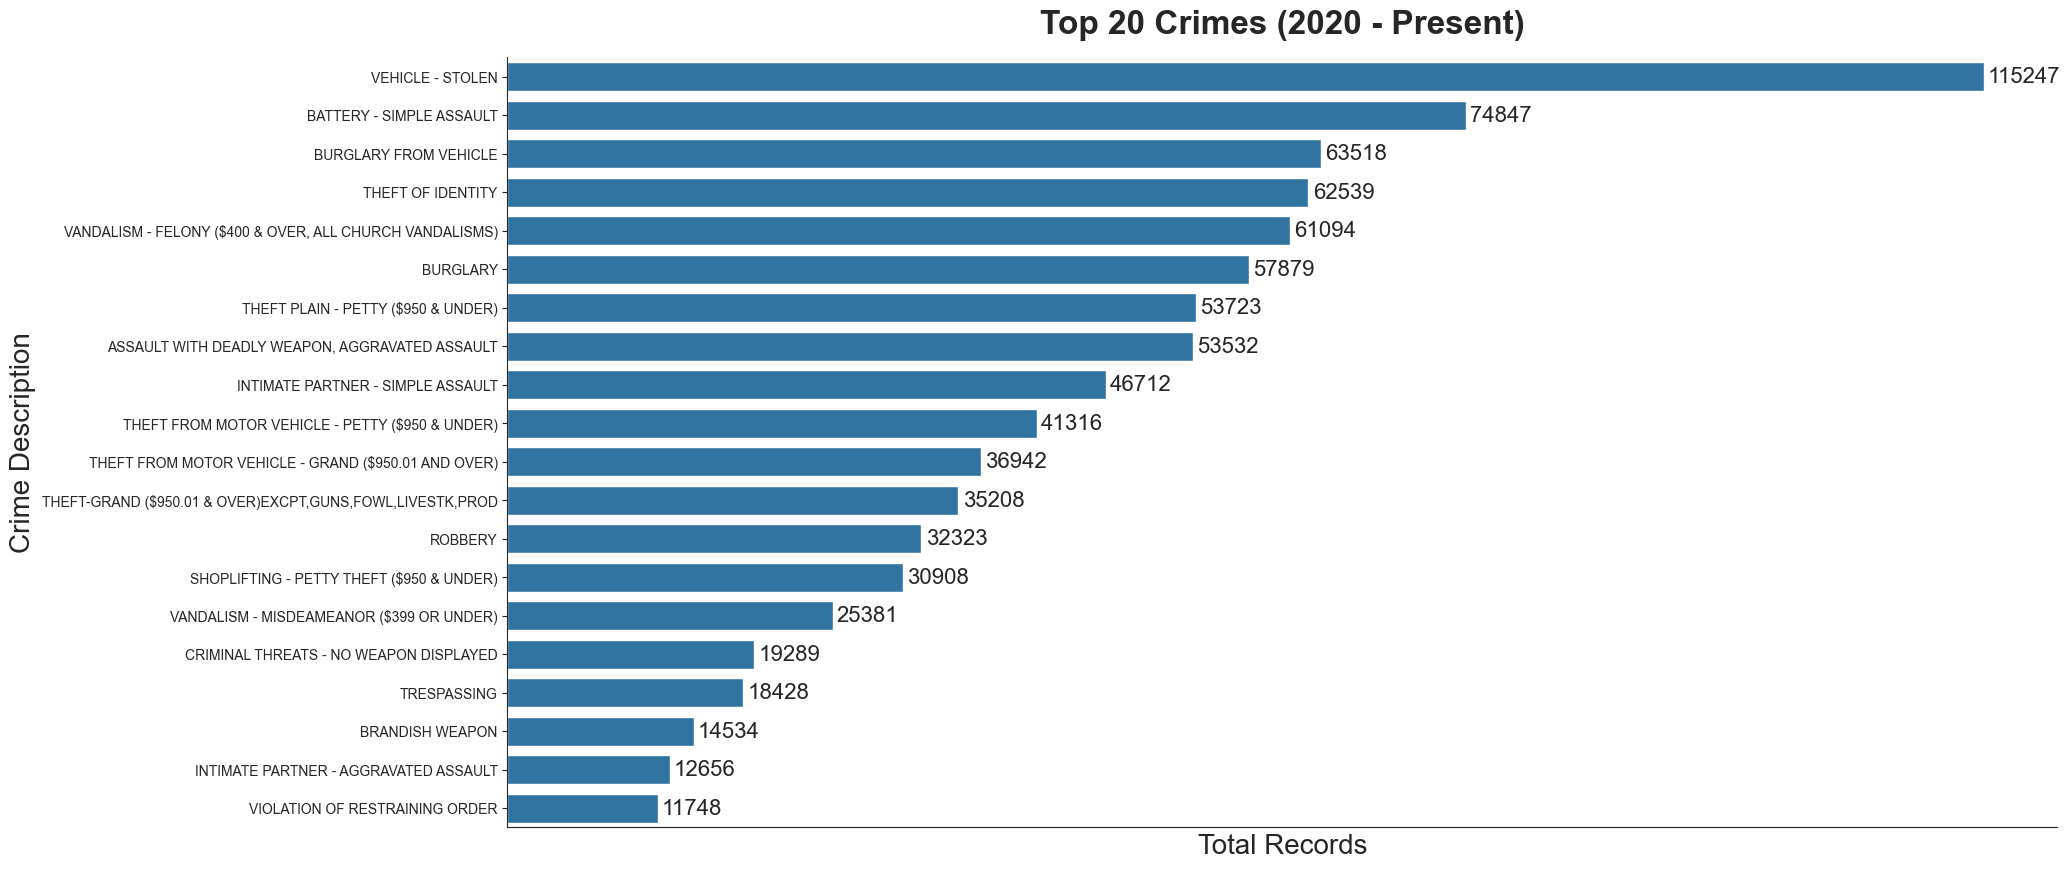

In [33]:
plt.figure(figsize=(20, 10))
sns.set_style('ticks')
cntplt = sns.barplot(crime_type_20, x="Count", y="CrimeDescription",estimator='sum', width=0.75)
cntplt.bar_label(cntplt.containers[0], label_type='edge', fontsize=16, padding=3)
cntplt.get_xaxis().set_ticks([])
cntplt.set_xlabel('Total Records', fontsize=20)
cntplt.set_ylabel('Crime Description', fontsize=20)
plt.title("Top 20 Crimes (2020 - Present)", fontsize=24, fontweight='bold', y=1.02)
sns.despine()
plt.show()
#plt.savefig("top20.png")

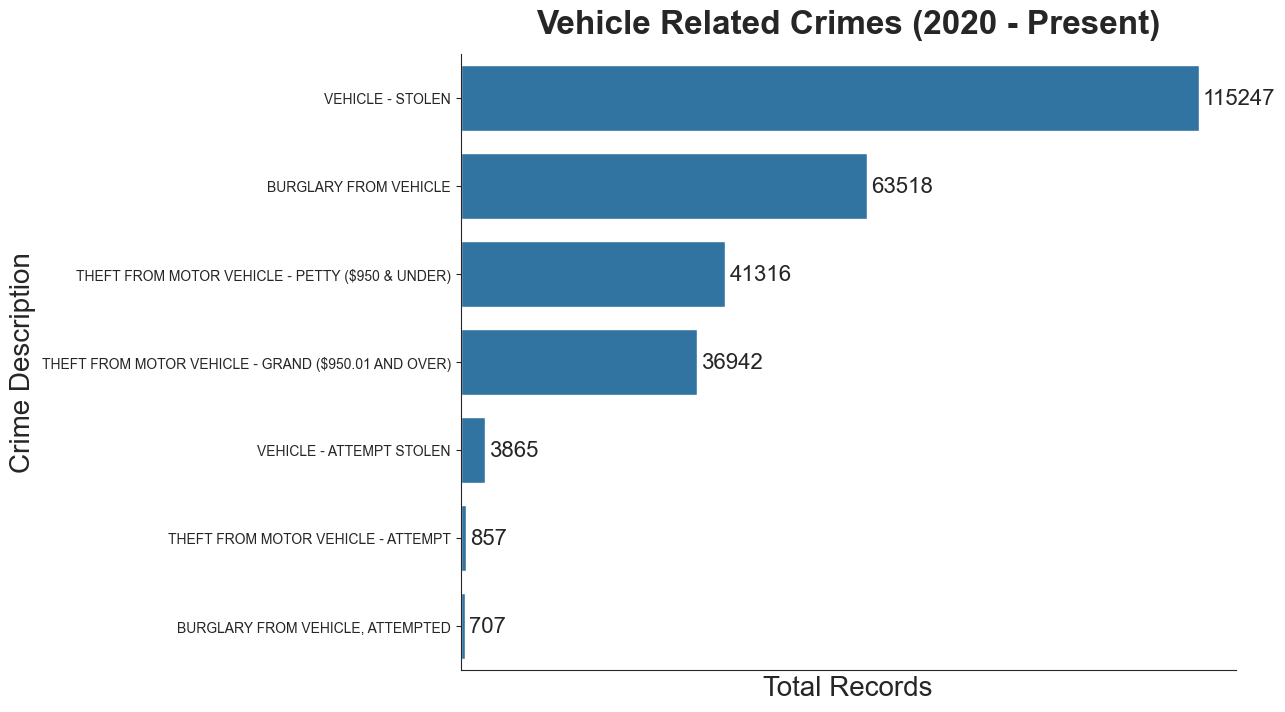

In [34]:
plt.figure(figsize=(10, 8))
sns.set_style('ticks')
cntplt = sns.barplot(vehicle_crime_type, x="Count", y="CrimeDescription",estimator='sum', width=0.75)
cntplt.bar_label(cntplt.containers[0], label_type='edge', fontsize=16, padding=3)
cntplt.get_xaxis().set_ticks([])
cntplt.set_xlabel('Total Records', fontsize=20)
cntplt.set_ylabel('Crime Description', fontsize=20)
plt.title("Vehicle Related Crimes (2020 - Present)", fontsize=24, fontweight='bold', y=1.02)
sns.despine()
plt.show()
#plt.savefig("top20VRC.svg")

In [35]:
total_crimes = crime_count.sum()
total_vrc = vehicle_crime_type.sum(axis=0, numeric_only=True, skipna=True)

percent_vrc = total_vrc / total_crimes * 100


print(f"Vehicle related crimes make up {percent_vrc}% of all crimes in LA")

Vehicle related crimes make up Count    26.109483
dtype: float64% of all crimes in LA


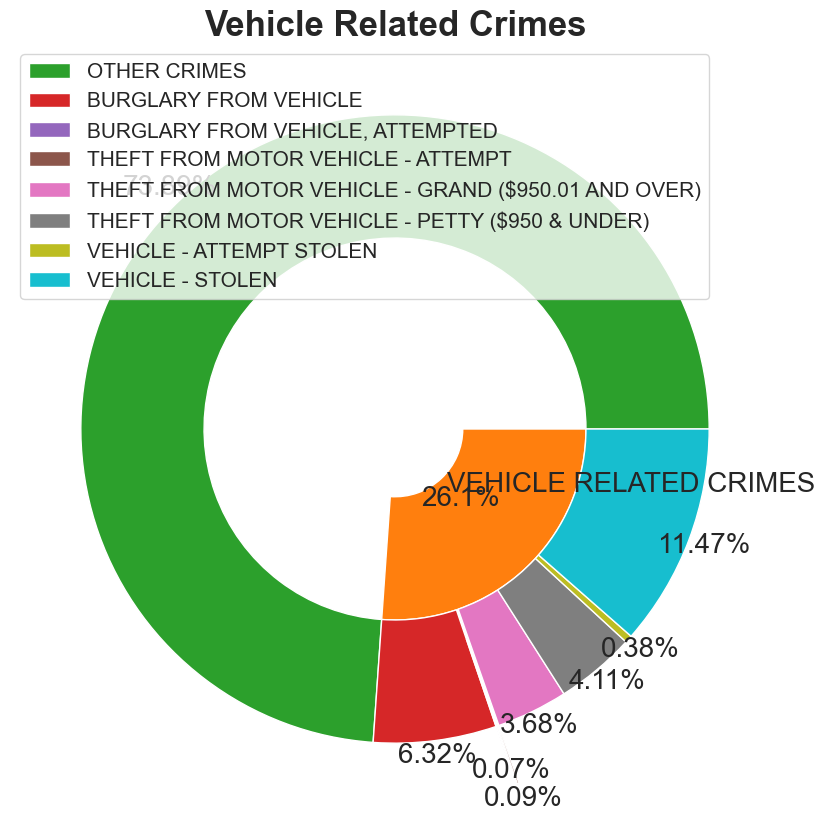

In [36]:
fig, ax = plt.subplots(figsize = (10,10))

piechart_df =  pd.DataFrame([
                    ["Crimes", "Other Crimes",742746],
                    ["VEHICLE - STOLEN" ,"Vehical Related Crimes", 115247],
                    ["BURGLARY FROM VEHICLE" ,"Vehical Related Crimes", 63518],
                    ["THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)" ,"Vehical Related Crimes", 41316],
                    ["THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)", "Vehical Related Crimes", 36942],
                    ["VEHICLE - ATTEMPT STOLEN" ,"Vehical Related Crimes", 3865],
                    ["THEFT FROM MOTOR VEHICLE - ATTEMPT" ,"Vehical Related Crimes", 857],
                    ["BURGLARY FROM VEHICLE, ATTEMPTED" ,"Vehical Related Crimes", 707]
                   ])
piechart_df.columns = ["Crime", "Crime_Type", "Crime_Count"]

inner = piechart_df.groupby("Crime_Type")
outer = piechart_df.groupby(['Crime_Type', 'Crime']).sum()
inner = inner.sum()

inner_labels = ['OTHER CRIMES', 'VEHICLE RELATED CRIMES']
outer_labels = ['OTHER CRIMES', 'BURGLARY FROM VEHICLE', 'BURGLARY FROM VEHICLE, ATTEMPTED','THEFT FROM MOTOR VEHICLE - ATTEMPT', 'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)','THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)','VEHICLE - ATTEMPT STOLEN','VEHICLE - STOLEN'] 


size = 0.4

ax_patch, ax_pct, ax_label =  ax.pie(inner["Crime_Count"].values.flatten(), labels = inner_labels, labeldistance=0.4, radius=1.02-size,pctdistance=0.5, autopct='%1.1f%%',
      wedgeprops=dict(width=size, edgecolor='w'), textprops = dict(fontsize = 20))

ax1_patch, ax1_pct, ax1_label = ax.pie(outer.values.flatten(), radius=1.02,autopct='%1.2f%%',pctdistance=1.05,
       wedgeprops=dict(width=size, edgecolor='w'),explode = [0, 0, 0.1,0.2,0,0,0,0],textprops = dict(fontsize = 20))

#ax.set(aspect="equal", title='Pie plot with `ax.pie`')
ax_patch[0].set_visible(False)
ax_label[0].set_visible(False)
ax_pct[0].set_visible(False)

#plt.figure(figsize = (10,6))
#sns.set_style("whitegrid")
#plt.pie(piechart_totals, labels = piechart_labels, autopct='%1.1f%%')
plt.legend(ax1_patch, outer_labels, loc="upper left",fontsize = 15)
plt.title("Vehicle Related Crimes", fontweight = 'bold', fontsize = 25)
plt.show()

#plt.savefig("donutplt.svg")

## Vehicle Related Crimes by Year

In [37]:
VRC = df.loc[(df['Crm_Cd_Desc'] == 'VEHICLE - STOLEN') | 
                                        (df['Crm_Cd_Desc'] == 'BURGLARY FROM VEHICLE') |
                                        (df['Crm_Cd_Desc'] == 'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)') |
                                        (df['Crm_Cd_Desc'] == 'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)') |
                                        (df['Crm_Cd_Desc'] == 'VEHICLE - ATTEMPT STOLEN') |
                                        (df['Crm_Cd_Desc'] == 'THEFT FROM MOTOR VEHICLE - ATTEMPT') |
                                        (df['Crm_Cd_Desc'] == 'BURGLARY FROM VEHICLE, ATTEMPTED') ]

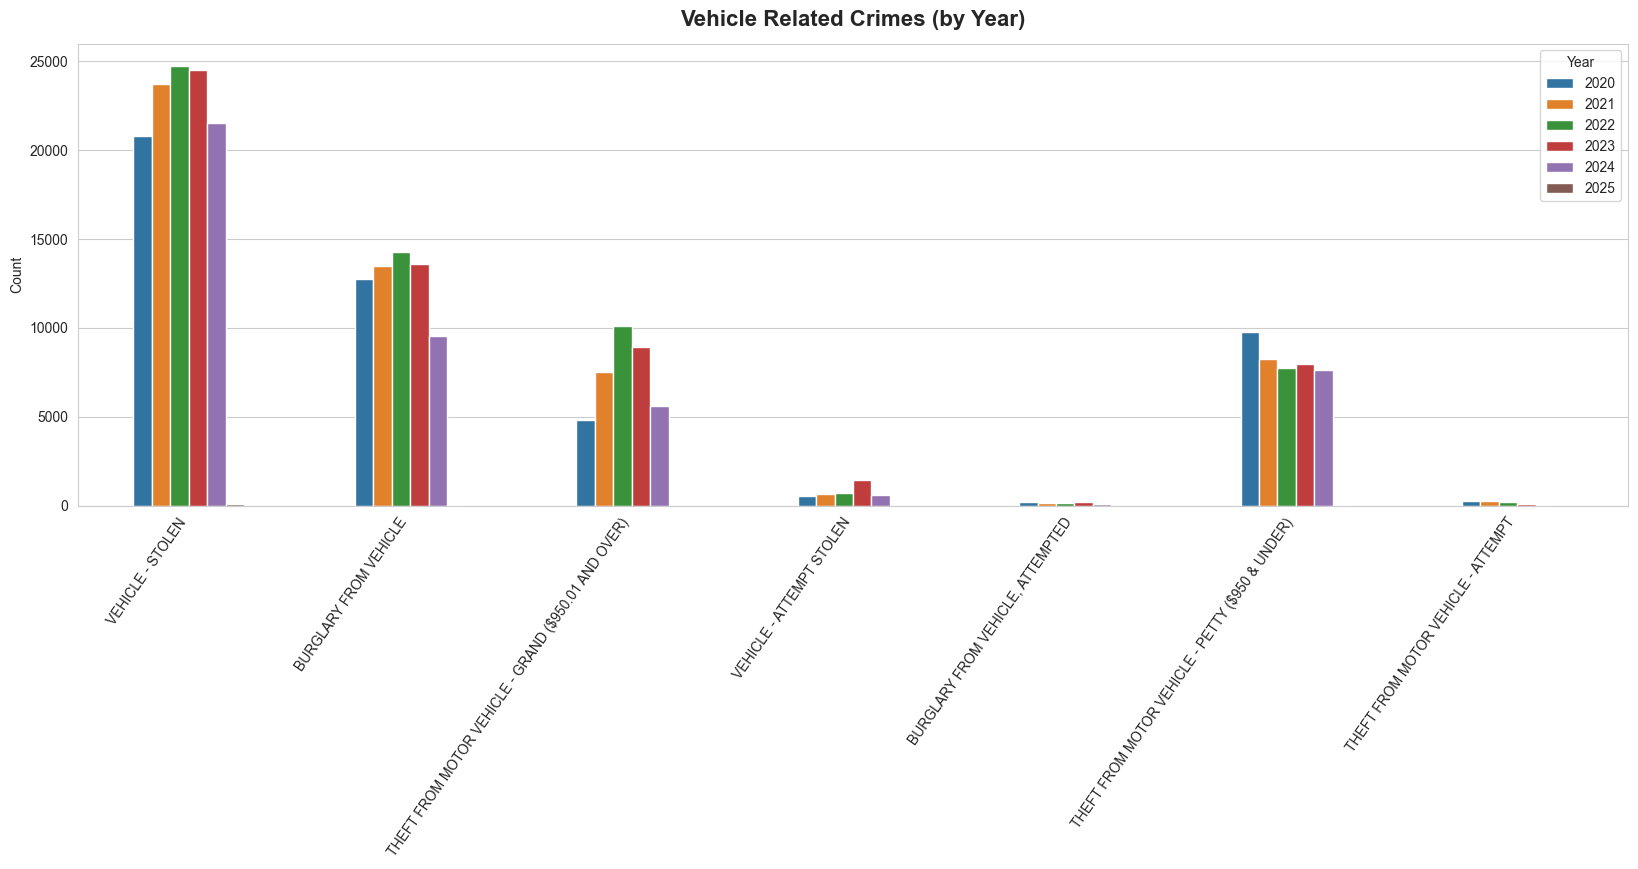

In [38]:
plt.figure(figsize=(20,6))
sns.set_style("whitegrid")
sns.countplot(VRC, x = 'Crm_Cd_Desc', hue='YEAR_OCC', width=0.5, stat="count")
plt.legend(title = "Year")
plt.xticks(rotation = 55, ha = 'right')
plt.xlabel("")
plt.ylabel("Count")
plt.title("Vehicle Related Crimes (by Year)", fontsize=16, fontweight='bold', y=1.02)
plt.show()


## Vehicular Thefts and Burglaries from Vehicals by Area

In [39]:
vt = df.loc[(df['Crm_Cd_Desc'] == 'VEHICLE - STOLEN') | 
                                        (df['Crm_Cd_Desc'] == 'BURGLARY FROM VEHICLE') |
                                        (df['Crm_Cd_Desc'] == 'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)') |
                                        (df['Crm_Cd_Desc'] == 'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)') |
                                        (df['Crm_Cd_Desc'] == 'VEHICLE - ATTEMPT STOLEN') |
                                        (df['Crm_Cd_Desc'] == 'THEFT FROM MOTOR VEHICLE - ATTEMPT') |
                                        (df['Crm_Cd_Desc'] == 'BURGLARY FROM VEHICLE, ATTEMPTED') ][['AREA_NAME', 'Crm_Cd_Desc','YEAR_OCC']]


vt_2020 = vt.loc[vt['YEAR_OCC'] == '2020']
vt_2021 = vt.loc[vt['YEAR_OCC'] == '2021']
vt_2022 = vt.loc[vt['YEAR_OCC'] == '2022']
vt_2023 = vt.loc[vt['YEAR_OCC'] == '2023']
vt_2024 = vt.loc[vt['YEAR_OCC'] == '2024']

vt.tail()

,AREA_NAME,Crm_Cd_Desc,YEAR_OCC
1005182,Southwest,VEHICLE - STOLEN,2025
1005187,West Valley,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,2025
1005190,Southwest,VEHICLE - STOLEN,2025
1005193,Southwest,VEHICLE - STOLEN,2025
1005196,Foothill,VEHICLE - STOLEN,2025


In [40]:
''' Total Count Of Crime for VEHICLE - STOLEN and BURGLARY FROM VEHICLE By Area (All Years) '''
area_total = vt['AREA_NAME'].value_counts()
area_total

AREA_NAME
Central        17808
Pacific        16992
Newton         14316
77th Street    14196
N Hollywood    14057
Northeast      13606
Olympic        13213
Southwest      13093
Mission        11882
Southeast      11879
Rampart        11816
Van Nuys       11770
Hollywood      11664
Wilshire       11514
Harbor         11423
West Valley    11392
Devonshire     11146
West LA        11074
Hollenbeck     10985
Topanga         9452
Foothill        9174
Name: count, dtype: int64

In [41]:
area_total.describe()

count       21.000000
mean     12497.714286
std       2137.477442
min       9174.000000
25%      11392.000000
50%      11816.000000
75%      13606.000000
max      17808.000000
Name: count, dtype: float64

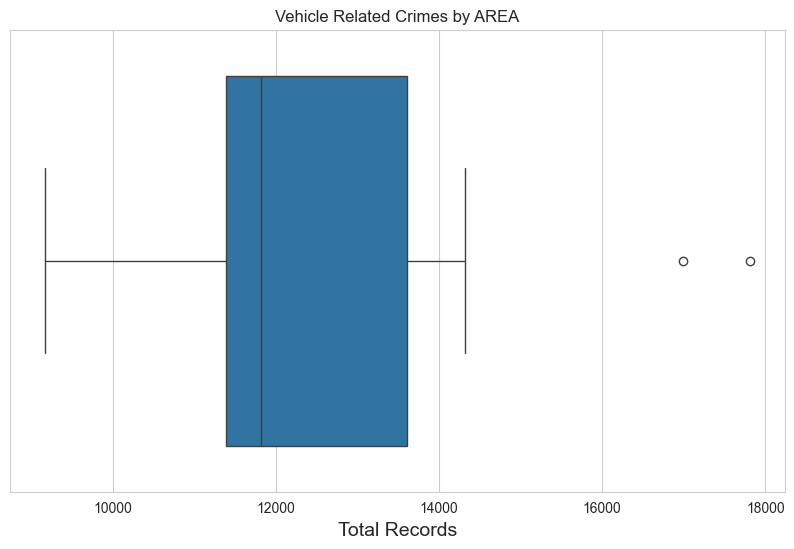

In [42]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
bxplt = sns.boxplot(data = area_total, orient='h')
bxplt.set_xlabel("Total Records", fontsize = 14)
plt.title('Vehicle Related Crimes by AREA')
plt.show()

In [43]:
''' CRIME TOTAL BY AREA DESCENDING ''' 
area_order = area_total.index
area_order


Index(['Central', 'Pacific', 'Newton', '77th Street', 'N Hollywood',
       'Northeast', 'Olympic', 'Southwest', 'Mission', 'Southeast', 'Rampart',
       'Van Nuys', 'Hollywood', 'Wilshire', 'Harbor', 'West Valley',
       'Devonshire', 'West LA', 'Hollenbeck', 'Topanga', 'Foothill'],
      dtype='object', name='AREA_NAME')

In [44]:
'''pivot table for all years (2020-2024) both VEHICLE - STOLEN and BURGLARY FROM VEHICLE'''
vt_allyear_pivot = vt.pivot_table(index=['AREA_NAME'], values='Crm_Cd_Desc',aggfunc={'Crm_Cd_Desc':"count"})
vt_allyear_pivot_sort = vt_allyear_pivot.sort_values(by = ['Crm_Cd_Desc'], ascending = False)
vt_allyear_pivot_sort

,Crm_Cd_Desc
AREA_NAME,
Central,17808
Pacific,16992
Newton,14316
77th Street,14196
N Hollywood,14057
Northeast,13606
Olympic,13213
Southwest,13093
Mission,11882


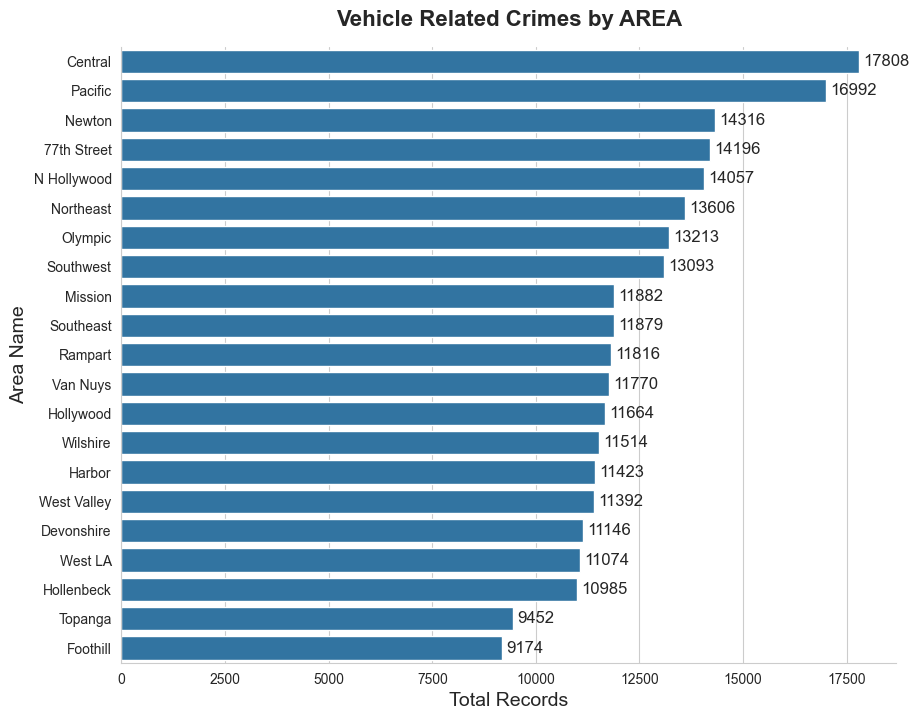

In [45]:
plt.figure(figsize=(10,8))
barplt = sns.barplot(vt_allyear_pivot_sort, y="AREA_NAME", x='Crm_Cd_Desc')
barplt.bar_label(barplt.containers[0], label_type='edge', fontsize=12, padding=3)
barplt.set_xlabel('Total Records', fontsize=14)
barplt.set_ylabel('Area Name', fontsize=14)
plt.title("Vehicle Related Crimes by AREA", fontsize=16, fontweight='bold', y=1.02)
sns.despine()
#plt.show()
plt.savefig("Vehicle Related Crimes by AREA.svg")

<Figure size 2000x1000 with 0 Axes>

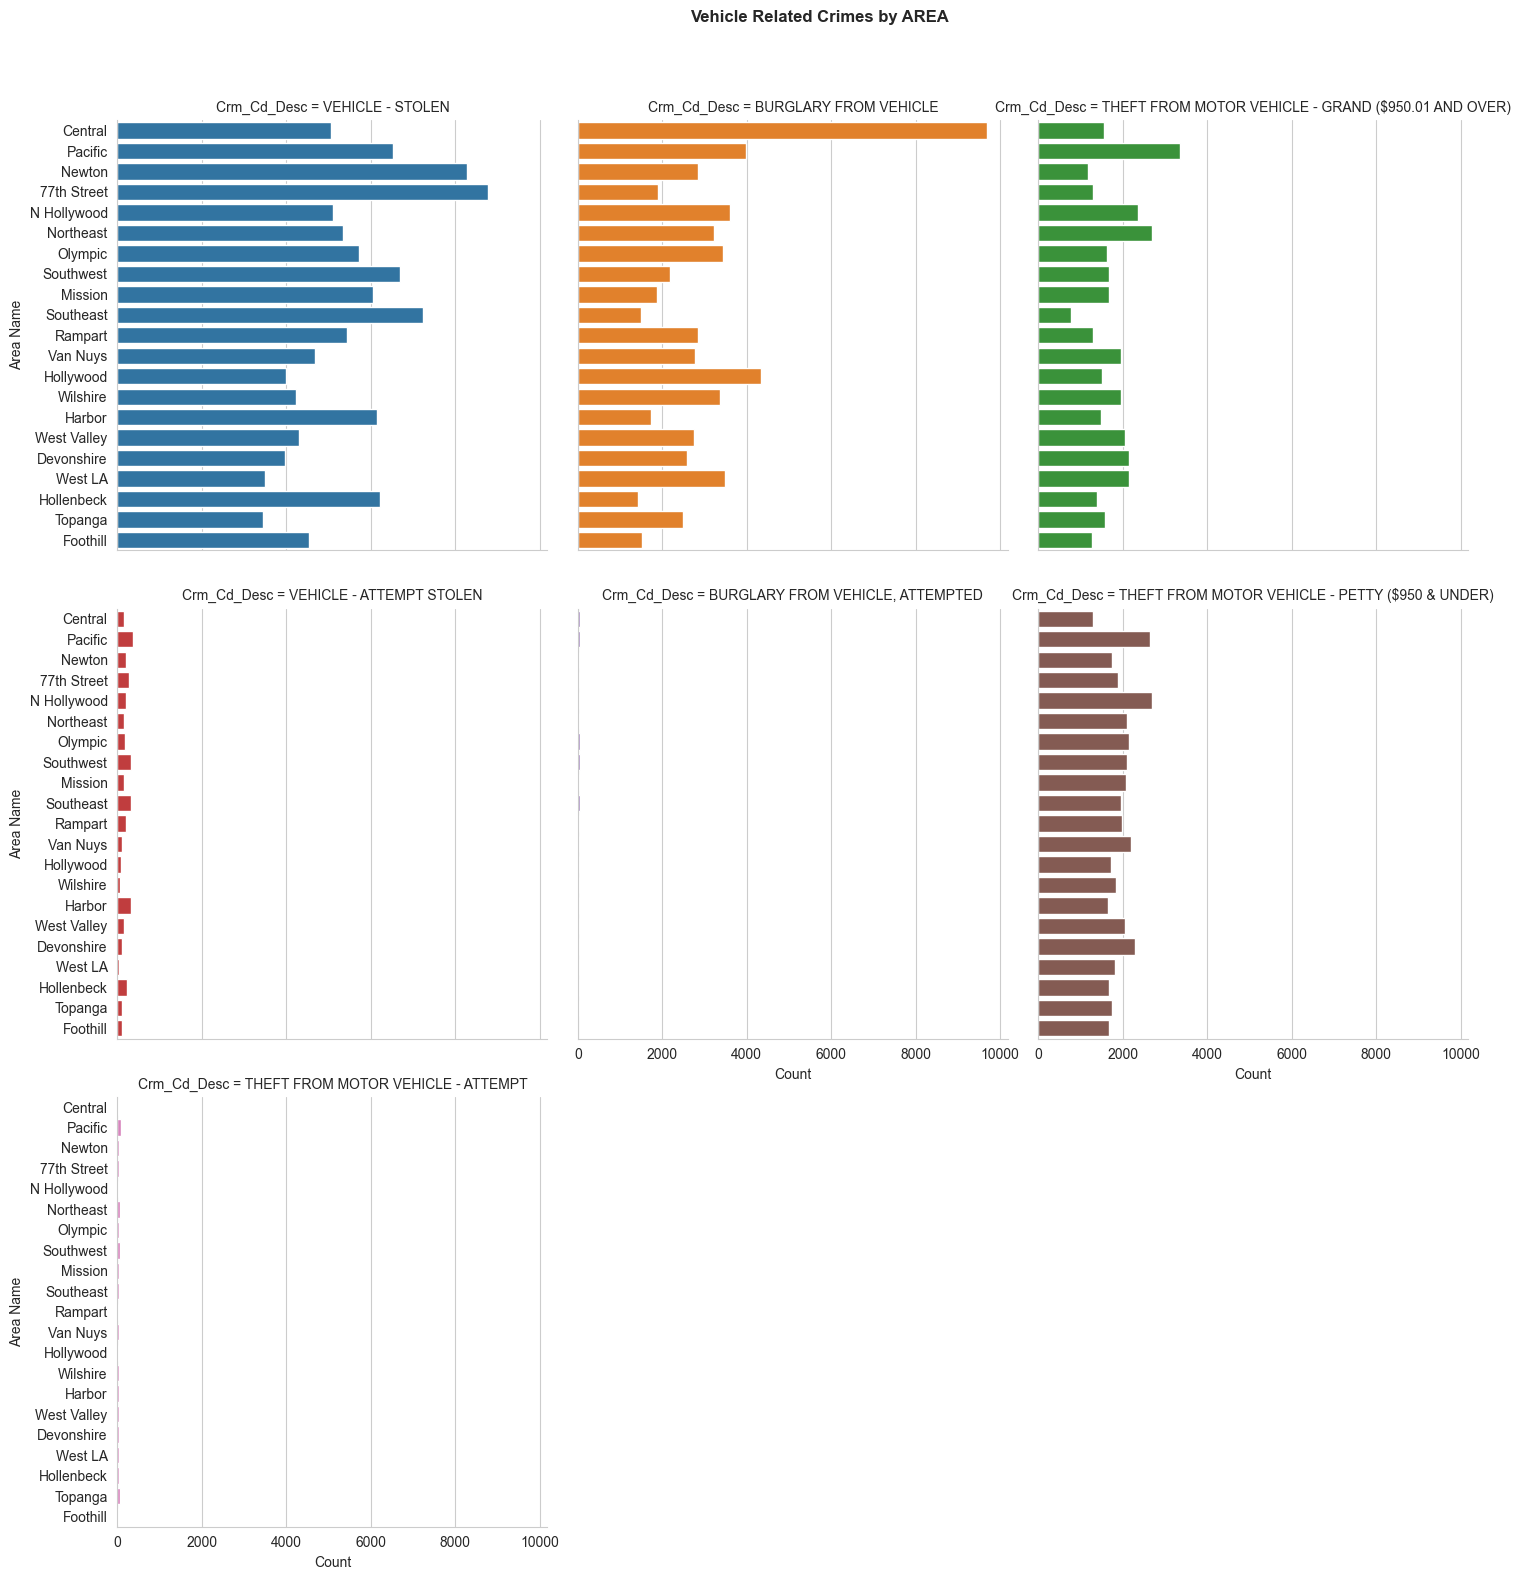

In [46]:
#Bar Chart for Crimes Commited By Area for All Years
plt.figure(figsize=(20,10))
total_crime_area = sns.catplot(data = vt, y='AREA_NAME', col='Crm_Cd_Desc', hue='Crm_Cd_Desc', order = area_order, kind='count', sharex=True, sharey=True, legend=False, col_wrap = 3)
total_crime_area.set_xlabels("Count")
total_crime_area.set_ylabels("Area Name")
plt.suptitle("Vehicle Related Crimes by AREA", y=1.05, x=0.55, fontweight = 'bold')
plt.show()

In [47]:
'''pivot table for each year'''
vt_peryear_pivot = vt.pivot_table(index=['YEAR_OCC', 'AREA_NAME'], columns=['Crm_Cd_Desc'], values='Crm_Cd_Desc', aggfunc={'Crm_Cd_Desc':"count"})
#vt_peryear_pivot.head()

In [48]:
'''
fig, axes = plt.subplots(2,3, figsize=(20,15), sharey=True, sharex=True, squeeze=True)


sns.countplot(ax=axes[0,0], data=vt_2020, y='AREA_NAME', hue='Crm_Cd_Desc', legend=True, order = area_order)
axes[0,0].set_title("2020")
axes[0,0].xaxis.set_tick_params(which='both', labelbottom=True)

sns.countplot(ax=axes[0,1], data=vt_2021, y='AREA_NAME', hue='Crm_Cd_Desc', legend=False, order = area_order)
axes[0,1].set_title("2021")
axes[0,1].xaxis.set_tick_params(which='both', labelbottom=True)

sns.countplot(ax=axes[0,2], data=vt_2022, y='AREA_NAME', hue='Crm_Cd_Desc', legend=False, order = area_order)
axes[0,2].set_title("2022")
axes[0,2].xaxis.set_tick_params(which='both', labelbottom=True)

sns.countplot(ax=axes[1,0], data=vt_2023, y='AREA_NAME', hue='Crm_Cd_Desc', legend=False, order = area_order)
axes[1,0].set_title("2023")

sns.countplot(ax=axes[1,1], data=vt_2024, y='AREA_NAME', hue='Crm_Cd_Desc', legend=False, order = area_order)
axes[1,1].set_title("2024")

#sns.countplot(ax=axes[1,2], data=vt_2025, y='AREA_NAME', hue='Crm_Cd_Desc', legend=False)
#axes[1,2].set_title("2025")
fig.delaxes(axes[1, 2 ])

#fig.legend(['VEHICLE - STOLEN','BURGLARY FROM VEHICLE'],loc='upper left', bbox_to_anchor=(0.12, 0.94))
fig.suptitle("Vehicle - Stolen & Burglary From Vehicle By Area/Year",fontsize=16, fontweight='bold', y=0.946)

for i in range(2):
    axes[i,0].set_ylabel("AREA NAME")
    
for i in range(3):
    axes[1,i].set_xlabel("Count")

    

plt.show()
'''

'\nfig, axes = plt.subplots(2,3, figsize=(20,15), sharey=True, sharex=True, squeeze=True)\n\n\nsns.countplot(ax=axes[0,0], data=vt_2020, y=\'AREA_NAME\', hue=\'Crm_Cd_Desc\', legend=True, order = area_order)\naxes[0,0].set_title("2020")\naxes[0,0].xaxis.set_tick_params(which=\'both\', labelbottom=True)\n\nsns.countplot(ax=axes[0,1], data=vt_2021, y=\'AREA_NAME\', hue=\'Crm_Cd_Desc\', legend=False, order = area_order)\naxes[0,1].set_title("2021")\naxes[0,1].xaxis.set_tick_params(which=\'both\', labelbottom=True)\n\nsns.countplot(ax=axes[0,2], data=vt_2022, y=\'AREA_NAME\', hue=\'Crm_Cd_Desc\', legend=False, order = area_order)\naxes[0,2].set_title("2022")\naxes[0,2].xaxis.set_tick_params(which=\'both\', labelbottom=True)\n\nsns.countplot(ax=axes[1,0], data=vt_2023, y=\'AREA_NAME\', hue=\'Crm_Cd_Desc\', legend=False, order = area_order)\naxes[1,0].set_title("2023")\n\nsns.countplot(ax=axes[1,1], data=vt_2024, y=\'AREA_NAME\', hue=\'Crm_Cd_Desc\', legend=False, order = area_order)\naxes[1

## Most common TIME_OCC for Burglary From Vehicle

In [49]:
time_df = df.loc[(df['Crm_Cd_Desc'] == 'VEHICLE - STOLEN') | 
                                        (df['Crm_Cd_Desc'] == 'BURGLARY FROM VEHICLE') |
                                        (df['Crm_Cd_Desc'] == 'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)') |
                                        (df['Crm_Cd_Desc'] == 'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)') |
                                        (df['Crm_Cd_Desc'] == 'VEHICLE - ATTEMPT STOLEN') |
                                        (df['Crm_Cd_Desc'] == 'THEFT FROM MOTOR VEHICLE - ATTEMPT') |
                                        (df['Crm_Cd_Desc'] == 'BURGLARY FROM VEHICLE, ATTEMPTED')][['DR_NO', 'DATE_OCC', 'YEAR_OCC', 'HR_OCC','Crm_Cd_Desc']]
time_df = time_df.loc[df['YEAR_OCC'] < '2024']

In [50]:
#get day of the week name for each date
date_series = pd.Series(pd.to_datetime(df['DATE_OCC']))
day_name_series = date_series.dt.day_name()
day_name_series = day_name_series.str.upper()




In [51]:
time_df['DAY_OCC'] = day_name_series.astype(str)
time_df = time_df.sort_values(by=['HR_OCC'], ascending=False)
time_df.DAY_OCC = time_df.DAY_OCC.astype("category")
time_df.DAY_OCC = time_df.DAY_OCC.cat.set_categories(['SUNDAY', 'MONDAY', 'TUESDAY', 'WEDNESDAY', 'THURSDAY', 'FRIDAY', 'SATURDAY'])
time_df = time_df.sort_values(["DAY_OCC"])

time_df.head()

,DR_NO,DATE_OCC,YEAR_OCC,HR_OCC,Crm_Cd_Desc,DAY_OCC
248754,211109157,05/30/2021,2021,00,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,SUNDAY
607398,220607661,03/20/2022,2022,11,VEHICLE - STOLEN,SUNDAY
525585,221116856,11/27/2022,2022,11,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,SUNDAY
40545,201116069,11/22/2020,2020,11,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),SUNDAY
633305,220211876,06/12/2022,2022,20,VEHICLE - STOLEN,SUNDAY


In [52]:
## BURGLARY FROM VEHICLE pivot table
time_BFV = time_df.loc[(time_df['Crm_Cd_Desc'] == 'BURGLARY FROM VEHICLE')][['DAY_OCC','HR_OCC', 'Crm_Cd_Desc']]
time_pivot_BFV = time_BFV.pivot_table(
        index=['HR_OCC'],
        columns='DAY_OCC',
        values = 'Crm_Cd_Desc',
        aggfunc='count',
        observed=False
)
time_pivot_BFV.head()

DAY_OCC,SUNDAY,MONDAY,TUESDAY,WEDNESDAY,THURSDAY,FRIDAY,SATURDAY
HR_OCC,,,,,,,
00,370,249,199,227,217,271,395
01,351,234,206,188,192,243,301
02,277,186,143,172,175,184,261
03,234,173,183,146,151,171,225
04,171,140,134,156,139,138,165


In [53]:
time_VS = time_df.loc[(time_df['Crm_Cd_Desc'] == 'VEHICLE - STOLEN')][['DAY_OCC','HR_OCC', 'Crm_Cd_Desc']]
time_pivot_VS = time_VS.pivot_table(
        index=['HR_OCC'],
        columns='DAY_OCC',
        values = 'Crm_Cd_Desc',
        aggfunc='count',
        observed=False
)
time_pivot_VS.head()

DAY_OCC,SUNDAY,MONDAY,TUESDAY,WEDNESDAY,THURSDAY,FRIDAY,SATURDAY
HR_OCC,,,,,,,
00,538,432,378,384,400,419,490
01,457,358,315,287,299,369,459
02,428,326,282,278,283,320,379
03,340,287,256,233,268,254,301
04,237,266,212,228,265,277,273


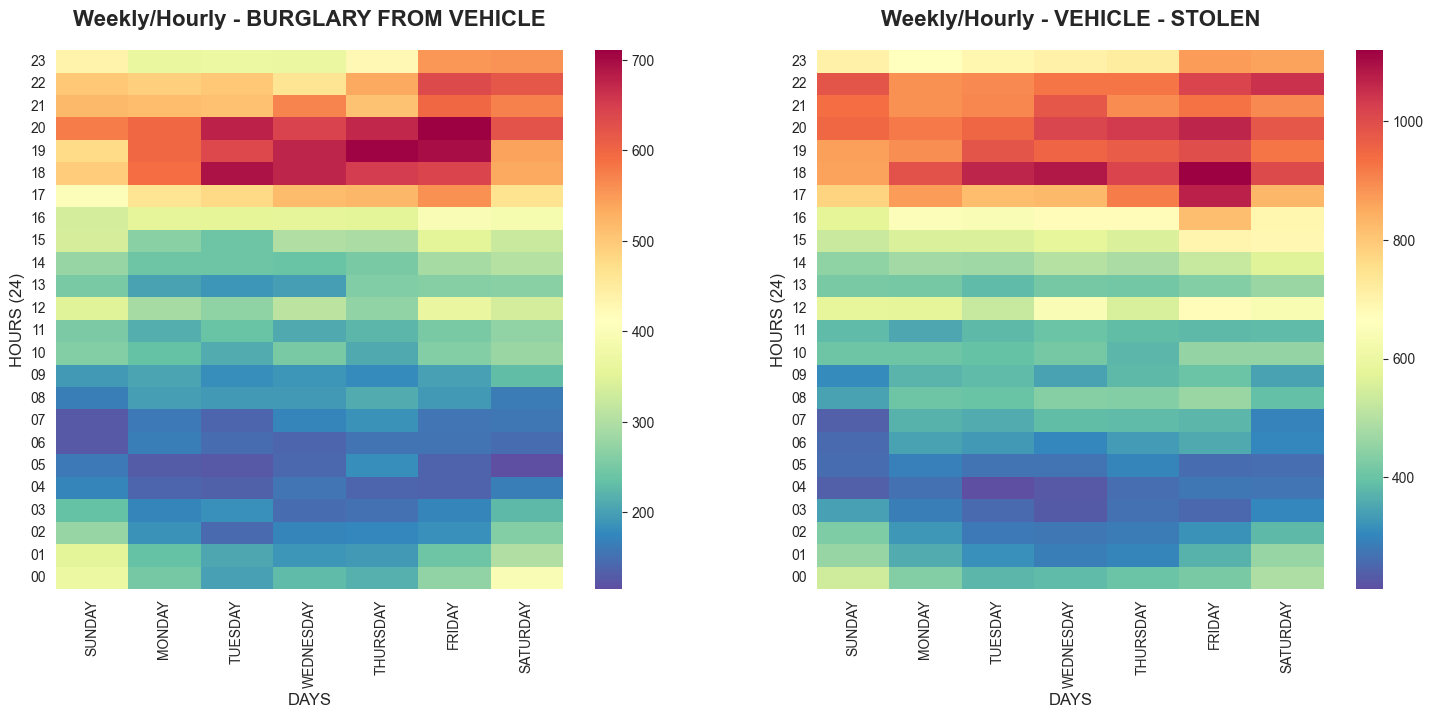

In [54]:
ylabels = ['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23']

fig, axes = plt.subplots(1, 2, figsize=(18,7))

sns.heatmap(ax=axes[0], data=time_pivot_BFV, cmap='Spectral_r').invert_yaxis()
axes[0].set_title("Weekly/Hourly - BURGLARY FROM VEHICLE", fontsize=16, fontweight='bold', y=1.03)

sns.heatmap(ax=axes[1], data=time_pivot_VS, cmap='Spectral_r').invert_yaxis()
axes[1].set_title("Weekly/Hourly - VEHICLE - STOLEN", fontsize=16, fontweight='bold', y=1.03)

for i in range(2):
    axes[i].set_xlabel("DAYS", fontsize=12)
    axes[i].set_ylabel("HOURS (24)", fontsize=12)
    axes[i].set_yticklabels(ylabels, rotation=360)

plt.show()

In [55]:
time_pivot_VRC = time_df.pivot_table(
        index=['HR_OCC'],
        columns='DAY_OCC',
        values = 'Crm_Cd_Desc',
        aggfunc='count',
        observed=False
)
time_pivot_VRC.head()

DAY_OCC,SUNDAY,MONDAY,TUESDAY,WEDNESDAY,THURSDAY,FRIDAY,SATURDAY
HR_OCC,,,,,,,
00,1193,947,870,879,919,969,1225
01,1065,862,746,731,739,869,1052
02,944,751,687,692,713,755,893
03,824,712,734,643,700,688,782
04,629,613,588,601,645,655,663


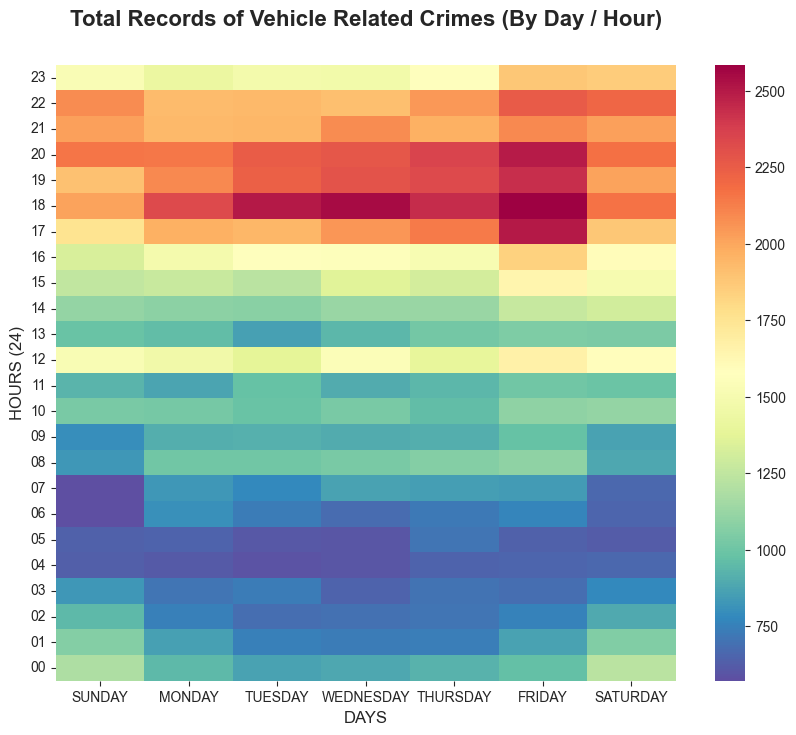

In [56]:
## Weekly / Hourly For Both VEHICLE - STOLEN & BURGLARY FROM VEHICLE

ylabels = ['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23']

plt.figure(figsize=(10,8))
sns.set_style("ticks")
wh_heatmp = sns.heatmap(data=time_pivot_VRC, cmap='Spectral_r', yticklabels = ylabels).invert_yaxis()
plt.title("Total Records of Vehicle Related Crimes (By Day / Hour)", fontsize=16, fontweight='bold', y = 1.05, loc='center')
plt.xlabel("DAYS", fontsize=12)
plt.ylabel("HOURS (24)", fontsize=12)
plt.yticks(rotation=360)

plt.show()

In [57]:
day_pivot_VRC = time_df.pivot_table(
        columns='DAY_OCC',
        values = 'Crm_Cd_Desc',
        aggfunc='count',
        observed=False
)
day_pivot_VRC.head()

DAY_OCC,SUNDAY,MONDAY,TUESDAY,WEDNESDAY,THURSDAY,FRIDAY,SATURDAY
Crm_Cd_Desc,29686,30075,30034,30723,31080,34081,31770


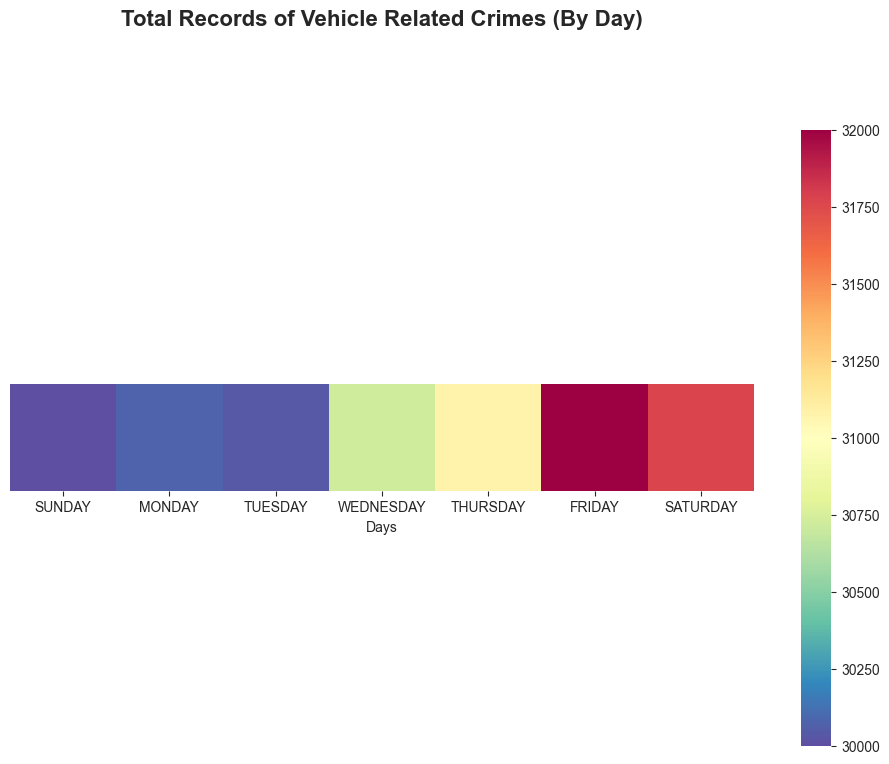

In [58]:
plt.figure(figsize=(12,8))
sns.set_style("ticks")
wh_heatmp = sns.heatmap(data=day_pivot_VRC, cmap='Spectral_r', vmin=30000, vmax=32000, square = True).invert_yaxis()
plt.title("Total Records of Vehicle Related Crimes (By Day)", fontsize=16, fontweight='bold', y = 4.3, loc='center')
plt.xlabel("Days")
plt.yticks([],rotation=360)

plt.show()

In [59]:
hour_pivot_VRC = time_df.pivot_table(
        columns='HR_OCC',
        values = 'Crm_Cd_Desc',
        aggfunc='count',
        observed=False
)
#hour_pivot_VS_BFV.head()

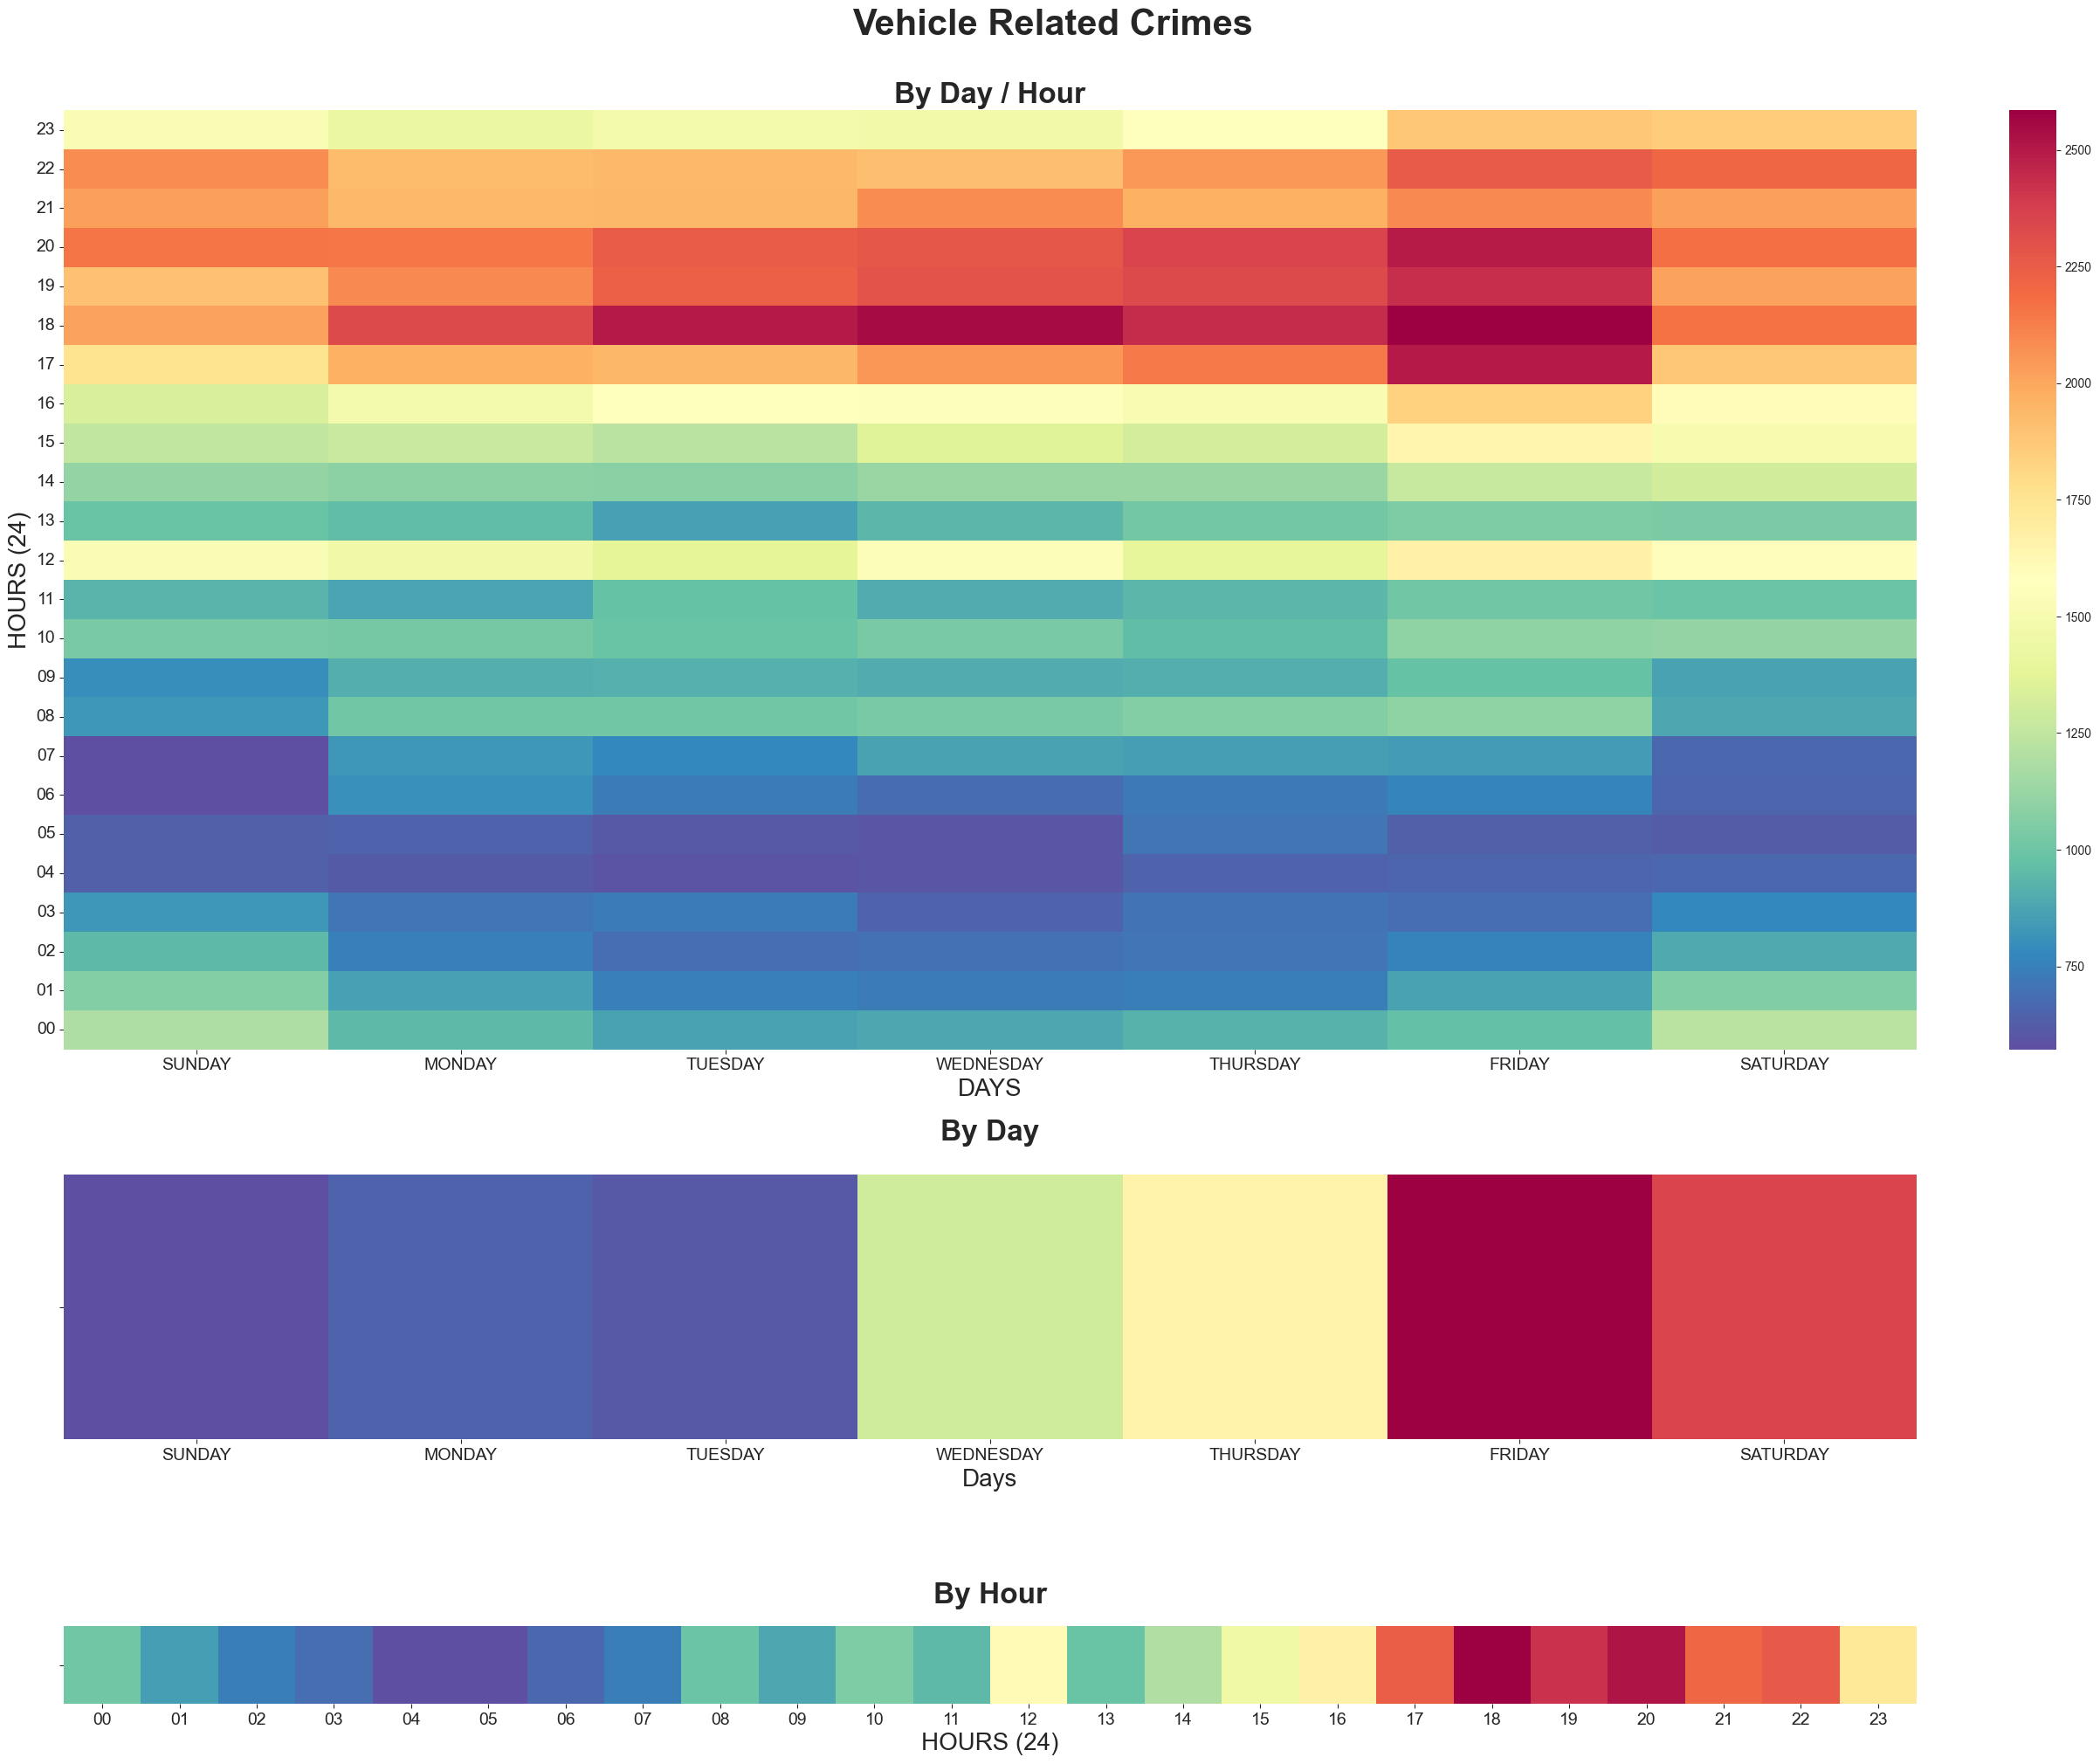

In [60]:
fig, axes = plt.subplots(3, 1, figsize=(24,20), constrained_layout=True, gridspec_kw={'height_ratios': [3, 1,1]})
sns.set_style("whitegrid")

ylabels = ['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23']
xlabels = ['SUNDAY', 'MONDAY', 'TUESDAY', 'WEDNESDAY', 'THURSDAY', 'FRIDAY', 'SATURDAY']

sns.heatmap(ax = axes[0], data=time_pivot_VRC, cmap='Spectral_r').invert_yaxis()
axes[0].set_title("By Day / Hour", fontsize=24, fontweight='bold', y = 1, loc='center')
axes[0].set_xlabel("DAYS", fontsize=20)
axes[0].set_ylabel("HOURS (24)", fontsize=20)
axes[0].set_yticklabels(ylabels, rotation=360, fontsize=14)
axes[0].set_xticklabels(xlabels, fontsize = 14)



sns.heatmap(ax = axes[1], data=day_pivot_VRC, cmap='Spectral_r', robust=True,vmin=30000, vmax=32000, square = True, cbar = False).invert_yaxis()
axes[1].set_title("By Day", fontsize=24, fontweight='bold', y=1.1, loc='center')
axes[1].set_xlabel("Days", fontsize=20)
axes[1].set_yticklabels([])
axes[1].set_xticklabels(xlabels, fontsize = 14)


sns.heatmap(ax = axes[2], data=hour_pivot_VRC, cmap='Spectral_r', square = True, robust=True, cbar=False).invert_yaxis()
axes[2].set_title("By Hour", fontsize=24, fontweight='bold',y=1.2)
axes[2].set_xlabel("HOURS (24)", fontsize=20)
axes[2].set_yticklabels([])
axes[2].set_xticklabels(ylabels, fontsize = 14)

fig.suptitle("Vehicle Related Crimes", fontsize=30, fontweight='bold', ha = 'center', y=1.04)
#plt.show()
plt.savefig("VRC_bytime.svg")

## Most Common Month By Year

In [61]:
date_df = df.loc[(df['Crm_Cd_Desc'] == 'VEHICLE - STOLEN') | 
                                        (df['Crm_Cd_Desc'] == 'BURGLARY FROM VEHICLE') |
                                        (df['Crm_Cd_Desc'] == 'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)') |
                                        (df['Crm_Cd_Desc'] == 'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)') |
                                        (df['Crm_Cd_Desc'] == 'VEHICLE - ATTEMPT STOLEN') |
                                        (df['Crm_Cd_Desc'] == 'THEFT FROM MOTOR VEHICLE - ATTEMPT') |
                                        (df['Crm_Cd_Desc'] == 'BURGLARY FROM VEHICLE, ATTEMPTED')][['DR_NO', 'DATE_OCC', 'YEAR_OCC', 'MM_OCC','Crm_Cd_Desc']]
date_df = date_df.loc[df['YEAR_OCC'] < '2024']

In [62]:
date_pivot_BFV = date_df.loc[(date_df['Crm_Cd_Desc'] == 'BURGLARY FROM VEHICLE')][['YEAR_OCC', 'MM_OCC','Crm_Cd_Desc']]
date_pivot_BFV = date_pivot_BFV.pivot_table(index=['YEAR_OCC'], columns=['MM_OCC'],values = 'Crm_Cd_Desc', aggfunc = {'Crm_Cd_Desc':'count'}, fill_value=0)
date_pivot_BFV

MM_OCC,01,02,03,04,05,06,07,08,09,10,11,12
YEAR_OCC,,,,,,,,,,,,
2020,1444,1235,1120,1151,1049,1059,1024,901,791,938,979,1023
2021,1127,1019,1023,989,1095,1010,1122,1116,1090,1336,1235,1317
2022,1362,1157,1220,1293,1230,1251,1089,1097,1089,1136,1056,1252
2023,1211,1103,1030,887,967,1036,1100,1125,1155,1337,1316,1298


In [63]:
date_pivot_VS = date_df.loc[(date_df['Crm_Cd_Desc'] == 'VEHICLE - STOLEN')][['YEAR_OCC', 'MM_OCC','Crm_Cd_Desc']]
date_pivot_VS = date_pivot_VS.pivot_table(index=['YEAR_OCC'], columns=['MM_OCC'],values = 'Crm_Cd_Desc', aggfunc = {'Crm_Cd_Desc':'count'}, fill_value=0)
date_pivot_VS

MM_OCC,01,02,03,04,05,06,07,08,09,10,11,12
YEAR_OCC,,,,,,,,,,,,
2020,1409,1281,1477,1838,1848,2090,1989,1838,1620,1818,1760,1804
2021,1873,1834,1811,1808,1832,1801,1846,1951,2050,2331,2236,2312
2022,2097,1907,2128,2215,2228,2018,2115,2175,2061,2053,1879,1870
2023,1956,1780,2007,1798,1898,1900,2165,2168,2102,2292,2223,2183


In [64]:
date_pivot_VS_BFV = date_df[['MM_OCC','Crm_Cd_Desc']]
date_pivot_VS_BFV = date_pivot_VS_BFV.pivot_table(columns=['MM_OCC'],values = 'Crm_Cd_Desc', aggfunc = {'Crm_Cd_Desc':'count'}, fill_value=0)
date_pivot_VS_BFV

MM_OCC,01,02,03,04,05,06,07,08,09,10,11,12
Crm_Cd_Desc,18855,17102,17675,17484,17734,17664,18246,18033,17401,19186,18641,19428


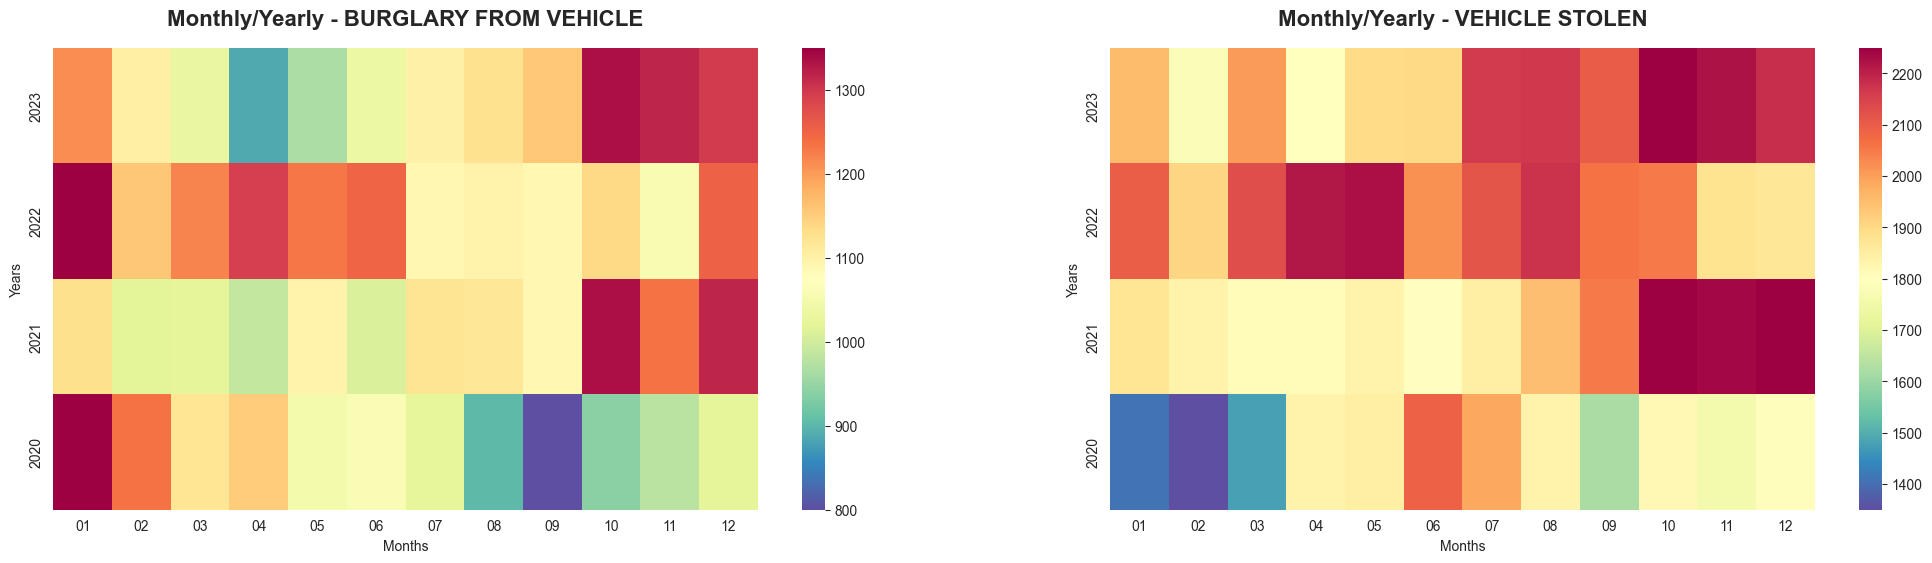

In [65]:
fig, axes = plt.subplots(1, 2, figsize = (25,6))

sns.heatmap(ax=axes[0], data = date_pivot_BFV,vmin = 800, vmax=1350, cmap="Spectral_r").invert_yaxis()
axes[0].set_title("Monthly/Yearly - BURGLARY FROM VEHICLE", fontsize=16, fontweight='bold', y=1.03)

sns.heatmap(ax=axes[1], data= date_pivot_VS,vmin = 1350, vmax=2250, cmap="Spectral_r").invert_yaxis()
axes[1].set_title("Monthly/Yearly - VEHICLE STOLEN", fontsize=16, fontweight='bold', y=1.03)

for i in range(2):
    axes[i].set_xlabel("Months")
    axes[i].set_ylabel("Years")
plt.show()

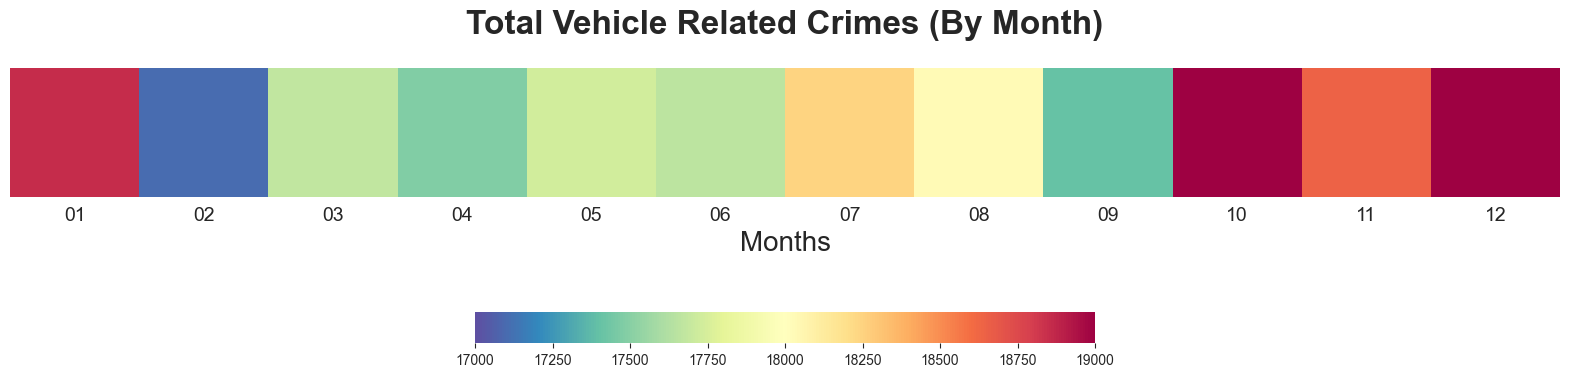

In [67]:
plt.figure(figsize = (20,6))

sns.heatmap(data = date_pivot_VS_BFV, cmap="Spectral_r", square = True, vmin = 17000, vmax = 19000, cbar_kws = dict(use_gridspec=True,location="bottom", shrink=0.4, pad=0.25)).invert_yaxis()
plt.title("Total Vehicle Related Crimes (By Month)", fontsize=24, fontweight='bold', y=1.2)
plt.xlabel("Months", fontsize=20)
plt.yticks([])
plt.xticks(fontsize=14)
plt.show()
#plt.savefig("Total Vehicle Related Crimes (By Month).svg")

In [70]:
df.columns

Index(['DR_NO', 'Date_Rptd', 'DATE_OCC', 'TIME_OCC', 'AREA', 'AREA_NAME',
       'Rpt_Dist_No', 'Part_1_2', 'Crm_Cd', 'Crm_Cd_Desc', 'Mocodes',
       'Vict_Age', 'Vict_Sex', 'Vict_Descent', 'Premis_Cd', 'Premis_Desc',
       'Weapon_Used_Cd', 'Weapon_Desc', 'Status', 'Status_Desc', 'Crm_Cd_1',
       'Crm_Cd_2', 'Crm_Cd_3', 'Crm_Cd_4', 'LOCATION', 'Cross_Street', 'LAT',
       'LON', 'YEAR_OCC', 'MM_DD_OCC', 'MM_OCC', 'HR_OCC'],
      dtype='object')

In [72]:
df.to_csv("lapd_crime_export.csv", encoding='utf-8', index=False)